# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [42]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

The code below describes an exchange economy with two agents A and B, with possible bundles illustrated in the Edgeworth box. The blue dots represents all the Pareto optimal bundles for the two agents, while the red dot illustrates the initial endowment. Thus all the blue dots are located above the initial endowment, they must all be Pareto optimal.

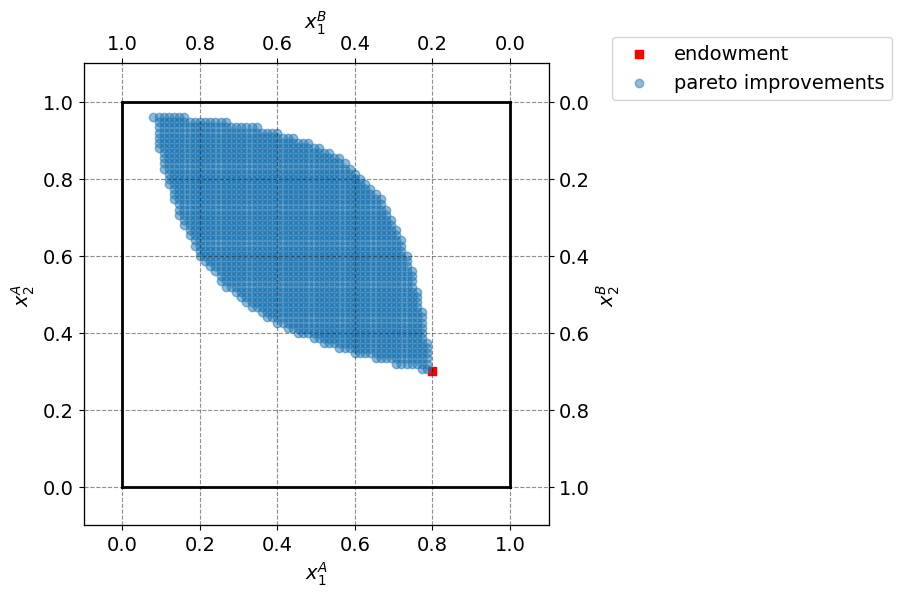

In [126]:
from ExchangeEconomy import ExchangeEconomyClass  # Import the ExchangeEconomyClass from ExchangeEconomy module

import matplotlib.pyplot as plt  # Import the pyplot module from matplotlib and alias it as plt
from types import SimpleNamespace  # Import the SimpleNamespace class from the types module
from scipy import optimize  # Import the optimize module from scipy
import numpy as np  # Import the numpy library and alias it as np

# Instantiate the ExchangeEconomyClass
model = ExchangeEconomyClass()

N = 75  # Define the number of points

w1A = 0.8  # Define the endowment for good 1 for agent A
w2A = 0.3  # Define the endowment for good 2 for agent A

# Create evenly spaced points between 0 and 1 for x1A and x2A
x1A = np.linspace(0,1,N+1)
x2A = x1A.copy()

x1_possible = []  # Initialize a list to store possible values of x1A
x2_possible = []  # Initialize a list to store possible values of x2A

# Loop through all combinations of x1A and x2A
for x1 in x1A:
    for x2 in x2A:
        # Check if the utility for agent A and B is greater than or equal to their initial utility
        if model.utility_A(x1,x2) >= model.utility_A(w1A,w2A) and model.utility_B((1-x1),(1-x2)) >= model.utility_B(1-w1A,1-w2A):
            x1_possible.append(x1)  # Append valid value of x1A to x1_possible
            x2_possible.append(x2)  # Append valid value of x2A to x2_possible

par = model.par  # Get the parameters from the ExchangeEconomyClass instance

# a. total endowment
w1bar = 1.0  # Define the total endowment for good 1
w2bar = 1.0  # Define the total endowment for good 2

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)  # Create a figure object with specified properties
ax_A = fig.add_subplot(1, 1, 1)  # Add a subplot to the figure

ax_A.set_xlabel("$x_1^A$")  # Set the label for x-axis of agent A's subplot
ax_A.set_ylabel("$x_2^A$")  # Set the label for y-axis of agent A's subplot

temp = ax_A.twinx()  # Create a twin axes sharing the x-axis
temp.set_ylabel("$x_2^B$")  # Set the label for y-axis of agent B's subplot
ax_B = temp.twiny()  # Create a twin axes sharing the y-axis
ax_B.set_xlabel("$x_1^B$")  # Set the label for x-axis of agent B's subplot
ax_B.invert_xaxis()  # Invert the x-axis of agent B's subplot
ax_B.invert_yaxis()  # Invert the y-axis of agent B's subplot

# Plot the endowment point for agent A and pareto improvements
ax_A.scatter(par.w1A,par.w2A,marker='s',color='red',label='endowment')  # Plot the endowment point for agent A
ax_A.scatter(x1_possible,x2_possible, alpha=0.5, label='pareto improvements')  # Plot pareto improvements

# Plot the limits of the plot
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')  # Plot the x-axis limit
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')  # Plot the y-axis limit
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')  # Plot the y-axis limit
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')  # Plot the x-axis limit

# Set the limits for both axes
ax_A.set_xlim([-0.1, w1bar + 0.1])  # Set the x-axis limits for agent A
ax_A.set_ylim([-0.1, w2bar + 0.1])  # Set the y-axis limits for agent A
ax_B.set_xlim([w1bar + 0.1, -0.1])  # Set the x-axis limits for agent B
ax_B.set_ylim([w2bar + 0.1, -0.1])  # Set the y-axis limits for agent B

# Add legend to the plot
ax_A.legend(frameon=True, loc='lower right', bbox_to_anchor=(1.76,0.9)) 

# Question 2

The following code calculates the error in the market clearing price for the given values of p1. Further, it plots the values of the errors for the given values.

[0.5, 0.5266666666666666, 0.5533333333333333, 0.58, 0.6066666666666667, 0.6333333333333333, 0.66, 0.6866666666666666, 0.7133333333333334, 0.74, 0.7666666666666666, 0.7933333333333333, 0.8200000000000001, 0.8466666666666667, 0.8733333333333333, 0.9, 0.9266666666666667, 0.9533333333333334, 0.98, 1.0066666666666668, 1.0333333333333332, 1.06, 1.0866666666666667, 1.1133333333333333, 1.1400000000000001, 1.1666666666666665, 1.1933333333333334, 1.22, 1.2466666666666666, 1.2733333333333334, 1.3, 1.3266666666666667, 1.3533333333333335, 1.38, 1.4066666666666667, 1.4333333333333333, 1.46, 1.4866666666666668, 1.5133333333333334, 1.54, 1.5666666666666667, 1.5933333333333333, 1.62, 1.6466666666666667, 1.6733333333333333, 1.7, 1.7266666666666666, 1.7533333333333334, 1.78, 1.8066666666666666, 1.8333333333333333, 1.86, 1.8866666666666667, 1.9133333333333333, 1.94, 1.9666666666666666, 1.9933333333333334, 2.02, 2.046666666666667, 2.0733333333333333, 2.1, 2.126666666666667, 2.1533333333333333, 2.1799999999

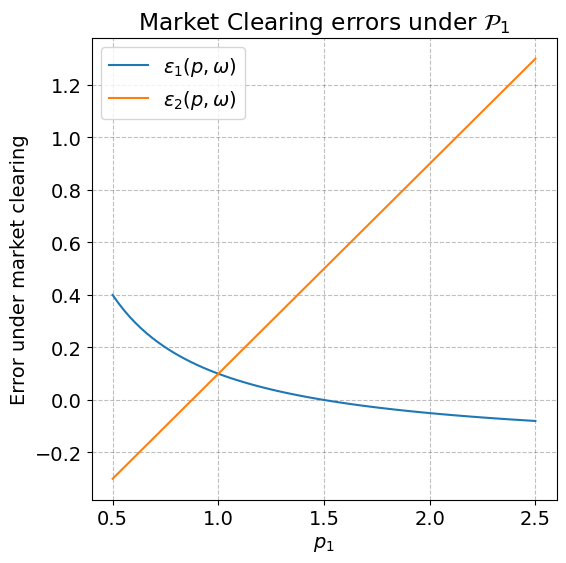

In [127]:
# Define p1 as an empty list 
p1 = []

# Use loop to make the p1 valueset
for i in range(N+1):
    p1.append(0.5 + 2*i/N)

# Ensure the values in the p1 list by printing 
print(p1) 

# Make error an empty list
error = []

# Calculate errors given by eps1 and eps2 by using the clearing condition which is given as: check_market_clearing from ExchangeEconomy.py 
for i in p1:
    error.append(model.check_market_clearing(i))

# See  the values of eps1 and eps2 from 1-10
print(error[0:10])

# Make the error list into two lists called error1 and error2 
error1,error2 = zip(*error)

# plot of errors 
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_C = fig.add_subplot(1, 1, 1)

ax_C.set_ylabel("Error under market clearing")
ax_C.set_xlabel("$p_1$")
ax_C.set_title("Market Clearing errors under $\mathcal{P}_1$")

# Plot the errors
ax_C.plot(p1, error1, label = '$\epsilon_1(p,\omega)$')
ax_C.plot(p1, error2, label = '$\epsilon_2(p,\omega)$')
ax_C.legend()

# Question 3

Below is the clearing price based on the two market clearing conditions. p1 is thus the market clearing price which is the rate at which one good is exchanged for another such that both agents are satisfied with the trade. Here, no agent has a incentive to deviate.

In [128]:
from scipy.optimize import minimize_scalar
from ExchangeEconomy import ExchangeEconomyClass  # Import the ExchangeEconomyClass from your Python file

# Instantiate the ExchangeEconomyClass
model = ExchangeEconomyClass()

# Define the optimization function (market_clearing_error)
def error_function(p1):
    return model.market_clearing_error(p1)

# Define the bounds for p1
bounds = (0.5, 2.5)  # Tuple containing the lower and upper bounds for p1

# Minimize the error function with bounds using minimize_scalar
result = minimize_scalar(error_function, bounds=bounds)

# Extract the optimal value of p1
optimal_p1 = result.x

# Print the result
print(f"Market clearing price p1: {optimal_p1}")

Value of p1: 0.6123735629362579


# Question 4a

The following code in 4a and 4b calculates the allocations of the two goods in the exchange economy for given constraints. Firstly, we calculate the allocation when the prices can only be chosen from the set defined in exercise 2. And secondly we set the condition that the price can only be stricly positive. 
The procedure is to first calculate the optimal price given the constraints, by setting up the utility maximization problem and thus obtaining the optimal price. We use the optimal price to calculate the corresponding allocations. 
For question 4a, the optimal price of good 1 is found to be around 2.5 and the  corresponding allocation for agent A is (0.38,0.23)
For question 4b, the optimal price of good 1 is 0.9 and the corresponding allocation for agent A is (0.26, 0.64). It would be optimal to calculate the utility levels for each allocation to see which option benefits agent A the most, but the same for both situations is that the utility of agent B is not taken in to account, thus yielding potential inequality in the economy.

In [129]:
from scipy.optimize import minimize_scalar

from types import SimpleNamespace


model = ExchangeEconomyClass()

# Define the utility function for agent A
def utility_A(p1):
    x1B, x2B = model.demand_B(p1)
    return model.utility_A(1 - x1B, 1 - x2B)

# Define the objective function to be maximized
def objective_function(p1):
    if p1 not in bounds:
        return float('inf')  # Return a large value to penalize if p1 is not in P1
    return -utility_A(p1, model.par.w2B)

# Find the price that maximizes agent A's utility within P1
result = minimize_scalar(objective_function, bounds=bounds, method='bounded')

# Extract the optimal price
optimal_price_p1 = result.x

# Calculate the corresponding allocation
optimal_x1B, optimal_x2B = model.demand_B(optimal_price_p1)
optimal_allocation_A = (1 - optimal_x1B, 1 - optimal_x2B)

print("Optimal price p1 agent A:", optimal_price_p1)
print("Optimal allocation agent A (xA1, xA2):", optimal_allocation_A)

Optimal price p1 agent A: 2.4999960023848327
Optimal allocation agent A (xA1, xA2): (0.3866665387427768, 0.23333439936404454)


# Question 4b

In [130]:
from scipy.optimize import minimize
from ExchangeEconomy import ExchangeEconomyClass

# Instantiate the ExchangeEconomyClass
model = ExchangeEconomyClass()


# Define the utility function for agent A
def utility_A(p1):
    x1B, x2B = model.demand_B(p1)
    return model.utility_A(1 - x1B, 1 - x2B)

# Define the objective function to be maximized
def objective_function(p1):
    if p1 <= 0:
        return float('inf')  # Return a large value to penalize if p1 is not positive
    return -utility_A(p1)

# Find the price that maximizes agent A's utility within the specified bounds
result = minimize(objective_function, x0=[3.0], bounds=[(0, None)])

# Extract the optimal price
optimal_price_p1 = result.x[0]

# Calculate the corresponding allocation
optimal_x1B, optimal_x2B = model.demand_B(optimal_price_p1)
optimal_allocation_A = (1 - optimal_x1B, 1 - optimal_x2B)

print("Optimal price p1 agent A:", optimal_price_p1)
print("Optimal allocation agent A (xA1, xA2):", optimal_allocation_A)


Optimal price p1 agent A: 0.9642918158121485
Optimal allocation agent A (xA1, xA2): (0.2592605716231704, 0.642855515783427)


/Users/annastenild/Desktop/projects-2024-karotennaanna/inauguralproject/ExchangeEconomy.py:20: RuntimeWarning: invalid value encountered in power
  return x1A**self.par.alpha * x2A**(1-self.par.alpha)


# Question 5a

In question 5a and 5b, we need to find the combination of goods that maximizes the utility of agent A while ensuring that agent B's utility remains at least as high as their initial endowment. The code iterates through possible combinations of goods and finally, it prints out the maximum utility of both agents and the corresponding allocations of goods. This ensures that the trade maximizes the utility of agent A while maintaining at least the initial utility level of agent B.

In 5a we need to maximize with the constraint that the optimal bundle must be among the Pareto improvements, seen in the first question. In 5b we maximize on the constraint that the utility of agent B must be at least as good as agent B's initial endowment.

In [142]:
from scipy.optimize import minimize

uAmax = -np.inf  # Initialize the maximum utility of agent A as negative infinity
x1best = -np.inf  # Initialize the optimal value of x1 for agent A as negative infinity
x2best = -np.inf  # Initialize the optimal value of x2 for agent A as negative infinity

# loops
for x1 in x1_possible:  # Iterate over possible values of x1 for agent A
    for x2 in x2_possible:  # Iterate over possible values of x2 for agent A
        uAnew = model.utility_A(x1, x2)  # Calculate the utility of agent A for the current (x1, x2) combination
        if model.utility_A(x1, x2) > uAmax and model.utility_B(1 - x1, 1 - x2) >= model.utility_B(1 - par.w1A, 1 - par.w2A):
            # Check if the utility of agent A is greater than the maximum utility so far
            # and if agent B's utility with the new allocation is not less than the initial endowment
            uAmax = uAnew  # Update the maximum utility of agent A
            x1best = x1  # Update the optimal value of x1 for agent A
            x2best = x2  # Update the optimal value of x2 for agent A

# Print the results
print(f'Utility A max = {uAmax:.3f}: (x1A, x2A) = ({x1best:.3f}, {x2best:.3f})')

Utility A max = 0.742: (x1A, x2A) = (0.560, 0.853)


# Question 5b

In [132]:
from scipy.optimize import minimize

# Define the utility function for agent A
def utility_A(xA1, xA2):
    return model.utility_A(xA1, xA2)

# Define the utility function for agent B
def utility_B(xB1, xB2):
    return model.utility_B(xB1, xB2)

# Define the objective function to be maximized
def objective_function(x):
    xA1, xA2 = x
    return -utility_A(xA1, xA2)

# Define the constraint function for agent B
def constraint_B(x):
    xB1 = 1 - x[0]
    xB2 = 1 - x[1]
    return utility_B(xB1, xB2) - utility_B(1-w1A,1-w2A)

# Initial guess for xA1 and xA2
initial_guess = [0.5, 0.5]

# Perform optimization to maximize utility subject to the constraint
result = minimize(objective_function, initial_guess, bounds=[(0, 1), (0, 1)], constraints={'type': 'ineq', 'fun': constraint_B})

# Extract the optimal allocation
optimal_allocation_A = result.x

print("Optimal allocation chosen by agent A (xA1, xA2):", optimal_allocation_A)

Optimal allocation chosen by agent A (xA1, xA2): [0.68087076 0.72506828]


# Question 6a

The following code calculate the allocation for agent A when a socail planner is maximizing the sum of the utility for both agent A and agent B. The optimal allocation for agent A is to consume x1=0.33333337 og x2=0.66666663, therefore it is the opposite for agent B. This result make sense given that the marginal utility for agent A is higher for x2 than x1 due to alpha=1/3 and vice versa with agent B. 

In [68]:

from scipy.optimize import minimize

# Define the utility function for agent A
def utility_A(xA1, xA2):
    return model.utility_A(xA1, xA2)

# Define the utility function for agent B
def utility_B(xB1, xB2):
    return model.utility_B(xB1, xB2)

# Define the objective function to be maximized (aggregate utility)
def objective_function(x):
    xA1, xA2 = x
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    return -(utility_A(xA1, xA2) + utility_B(xB1, xB2))

# Initial guess for xA1 and xA2
initial_guess = [0.5, 0.5]

# Perform optimization to maximize aggregate utility
result = minimize(objective_function, initial_guess, bounds=[(0, 1), (0, 1)])

# Extract the optimal allocation
optimal_allocation_A = result.x

print("Optimal allocation chosen to maximize aggregate utility (xA1, xA2):", optimal_allocation_A)

Optimal allocation chosen to maximize aggregate utility (xA1, xA2): [0.33333337 0.66666663]


# Question 6b

The following code gives a visuel output of all allocation point for agent A. From the graph we see that some of the allocations are outside the edgeworth box from question 1 and therefore not a pareto improvement. The others are more difficult from only the graph to identify which is more optimal for both agents. 

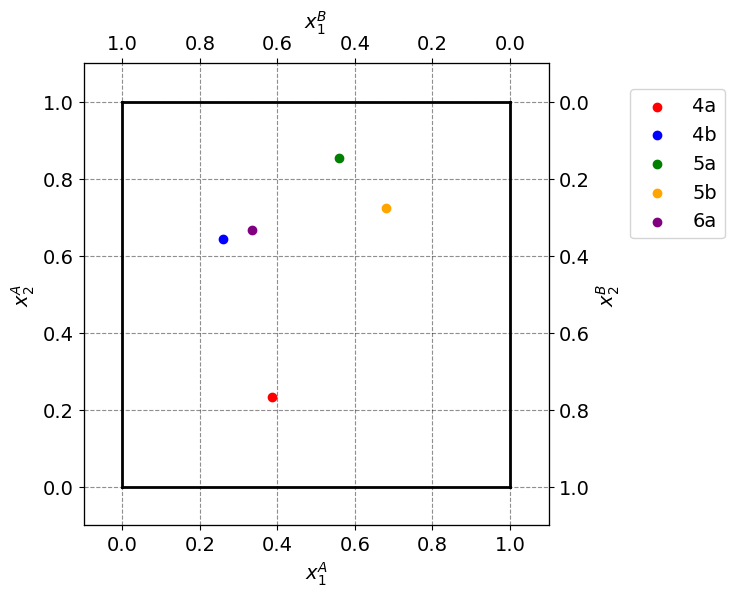

In [88]:
import matplotlib.pyplot as plt

# Define the points and their names and colors
points = [(0.3866665387427768, 0.23333439936404454),
          (0.2592605716231704, 0.642855515783427),
          (0.560, 0.853),
          (0.68087076, 0.72506828),
          (0.33333337, 0.66666663)]
point_labels = ['4a', '4b', '5a', '5b', '6a']
colors = ['red', 'blue', 'green', 'orange', 'purple']

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plot the limits
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Plot the points with colors and labels
for point, label, color in zip(points, point_labels, colors):
    ax_A.scatter(*point, color=color, label=label)

ax_A.legend(frameon=True, loc='lower right', bbox_to_anchor=(1.4, 0.6))

plt.show()


# Question 7

The following code generates a random set of endowments that are restricted to being uniformly distributed and plots them. As this is random, there is not much intuition to apply to this.

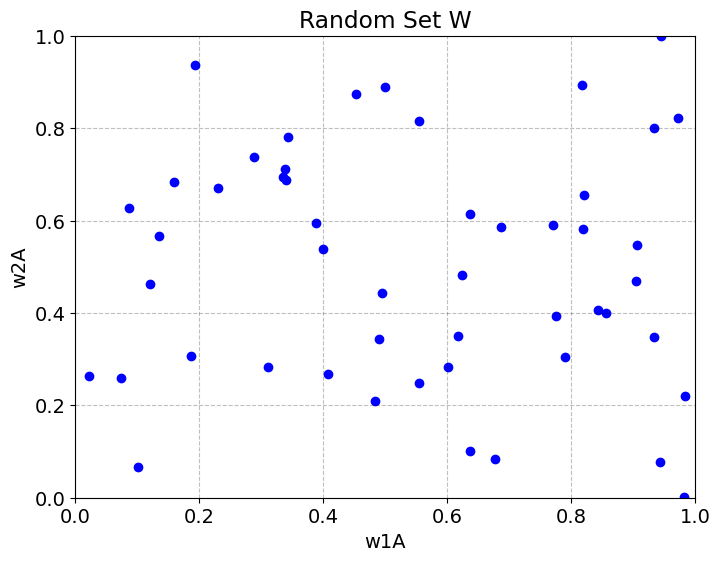

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Number of elements in the set
num_elements = 50

# Generate random values for w1A and w2A uniformly distributed between 0 and 1
w1A = np.random.rand(num_elements)
w2A = np.random.rand(num_elements)

# Plot the set
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(w1A, w2A, color='b', marker='o')  # Scatter plot of w1A and w2A
plt.title('Random Set W')  # Set the title of the plot
plt.xlabel('w1A')  # Label for the x-axis
plt.ylabel('w2A')  # Label for the y-axis
plt.xlim(0, 1)  # Set the limits for the x-axis
plt.ylim(0, 1)  # Set the limits for the y-axis
plt.grid(True)  # Enable grid lines
plt.show()  # Display the plot

# Question 8

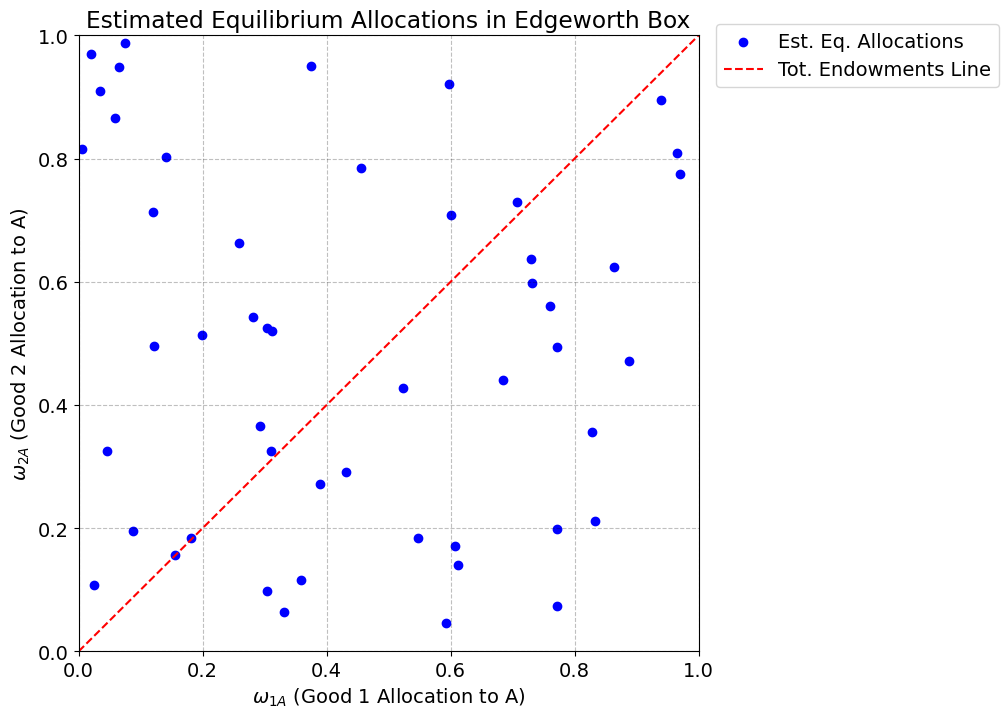

In [133]:

import numpy as np  # Import the numpy library and alias it as np
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module and alias it as plt

np.random.seed(42)  # Set the seed for reproducibility

# Generate random numbers uniformly distributed between 0 and 1 in a 50x2 array
W = np.random.uniform(0, 1, (50, 2))

# Define a function to estimate equilibrium allocations given omega_1A and omega_2A
def estimate_equilibrium(omega_1A, omega_2A):
    return omega_1A, omega_2A

# Use list comprehension to estimate equilibrium allocations for each omega in W
equilibrium_allocations = np.array([estimate_equilibrium(omega[0], omega[1]) for omega in W])

# Create a new figure for the plot with a size of 8x8 inches
plt.figure(figsize=(8, 8))

# Scatter plot of equilibrium allocations, using the first column as x-coordinates and the second column as y-coordinates
plt.scatter(equilibrium_allocations[:, 0], equilibrium_allocations[:, 1], color='blue', label='Est. Eq. Allocations')

# Set title and labels for the plot
plt.title('Estimated Equilibrium Allocations in Edgeworth Box')
plt.xlabel('$\omega_{1A}$ (Good 1 Allocation to A)')
plt.ylabel('$\omega_{2A}$ (Good 2 Allocation to A)')

# Set limits for the x and y axes
plt.xlim(0, 1)
plt.ylim(0, 1)

# Add a dashed red line representing the total endowments line
plt.axline((0, 0), (1, 1), color='red', linestyle='--', label='Tot. Endowments Line')

# Add a legend to the plot
plt.legend(frameon=True, loc='lower right', bbox_to_anchor=(1.5, 0.9))

# Display grid lines on the plot
plt.grid(True)

# Show the plot
plt.show()